 Load the image of the Karman vortices with the following commands

(739, 850)


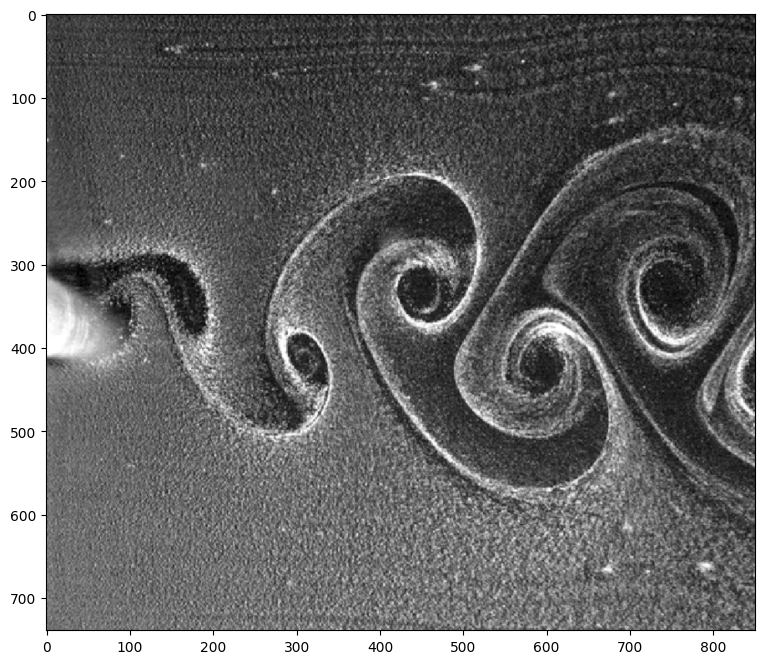

In [8]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16,8]
A =imread(os.path.join('./data/Karman.png'))
X = np.mean(A,-1); # Convert RGB to grayscale
print(X.shape)
img = plt.imshow(X, cmap='gray')
plt.show()

1. Compute the economy SVD.


In [9]:
U, s, VT = np.linalg.svd(X, full_matrices=False)


2. Let $\mathbf{X}$ be the matrix representing the true image and $\mathbf{\tilde{X}}$ the approximation of rank $r$ obtained using the SVD. Compute and plot the relative reconstruction error of the truncated SVD in the Frobenius norm as a function of the rank $r$. The expression of the relative reconstruction error is given by:

   $$
   \frac{\|\mathbf{X} - \mathbf{\tilde{X}}\|_F}{\|\mathbf{X}\|_F}.
   $$


In [11]:
X_tilde = U[:, :4] @ np.diag(s[:4]) @ VT[:4, :]
X_tilde.shape

(739, 850)

In [12]:
def reconstruction_error(X,Xk):
    return np.linalg.norm(X -Xk, 'fro') / np.linalg.norm(X, 'fro')

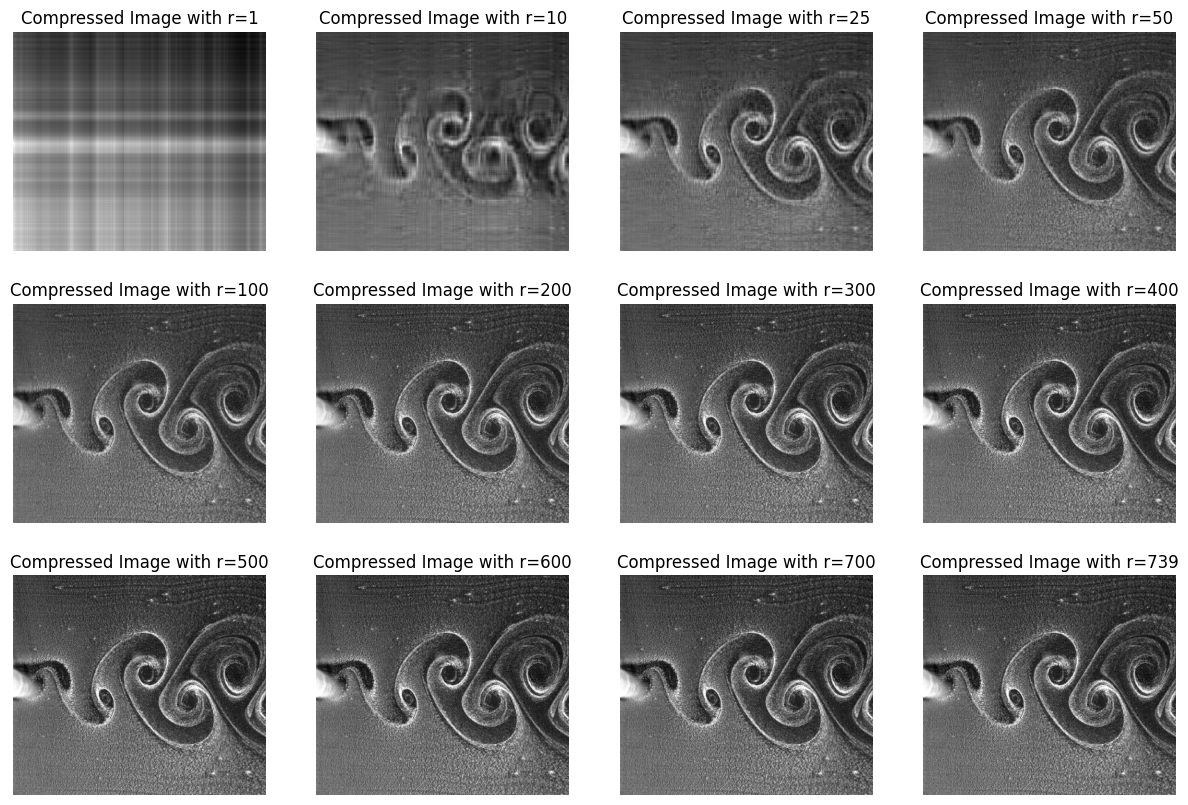

In [23]:
ranks = [1, 10, 25, 50, 100, 200, 300, 400, 500, 600, 700, 739]

fig, axs = plt.subplots(3, int(len(ranks)/3), figsize=(15, 10))
axs = axs.flatten()

histories_reconstruction_errors = {}
for i,r in enumerate(ranks):
    X_tilde = U[:, :r] @ np.diag(s[:r]) @ VT[:r, :]
    histories_reconstruction_errors[r] = reconstruction_error(X,X_tilde)
    # Plot the compressed image
    axs[i].imshow(X_tilde, cmap='gray')
    axs[i].set_title(f'Compressed Image with r={r}')
    axs[i].axis('off')


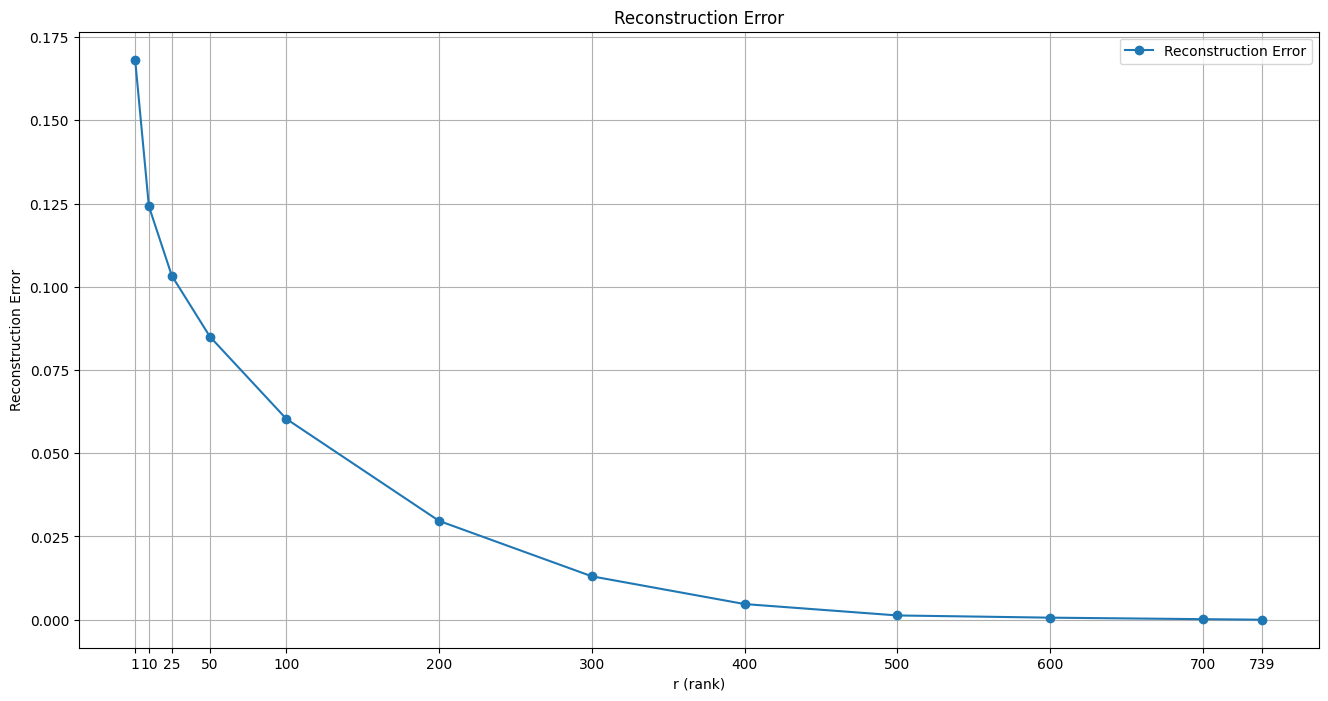

In [27]:
# Extract x and y values from the dictionary
x = [r for r in ranks]  # Extract k values as integers
errors = list(histories_reconstruction_errors.values())  # Corresponding reconstruction errors

# Plot the line connecting the points
plt.plot(x, errors, marker='o', linestyle='-', label="Reconstruction Error")  # Line with points
plt.title("Reconstruction Error")
plt.xlabel("r (rank)")
plt.ylabel("Reconstruction Error")
plt.xticks(x)  # Set x-ticks to match the k values
plt.grid(True)
plt.legend()
plt.show()

3. Square this error (and plot it) to compute the fraction of the missing variance as a function of $r$.

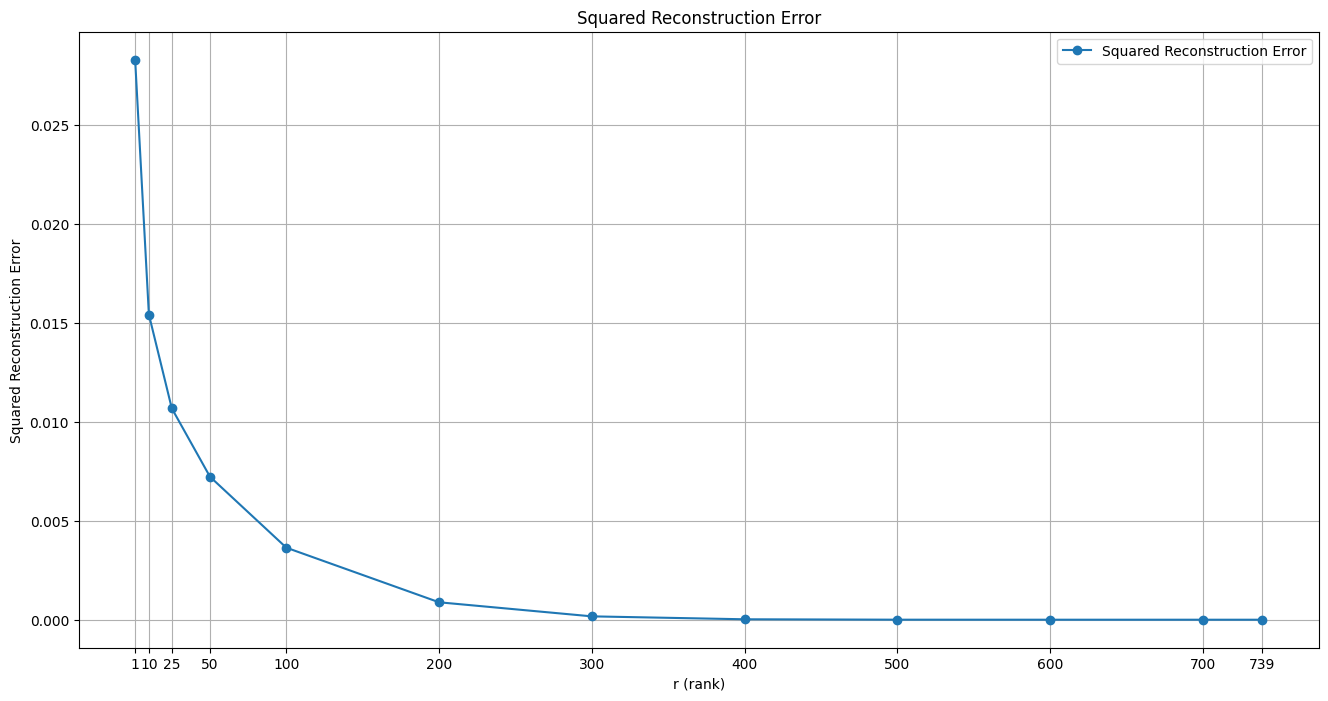

In [28]:
# Extract x and y values from the dictionary
x = [r for r in ranks]  # Extract k values as integers
variances = np.array(list(histories_reconstruction_errors.values()))**2

# Plot the line connecting the points
plt.plot(x, variances, marker='o', linestyle='-', label="Squared Reconstruction Error")  # Line with points
plt.title("Squared Reconstruction Error")
plt.xlabel("r (rank)")
plt.ylabel("Squared Reconstruction Error")
plt.xticks(x)  # Set x-ticks to match the k values
plt.grid(True)
plt.legend()
plt.show()

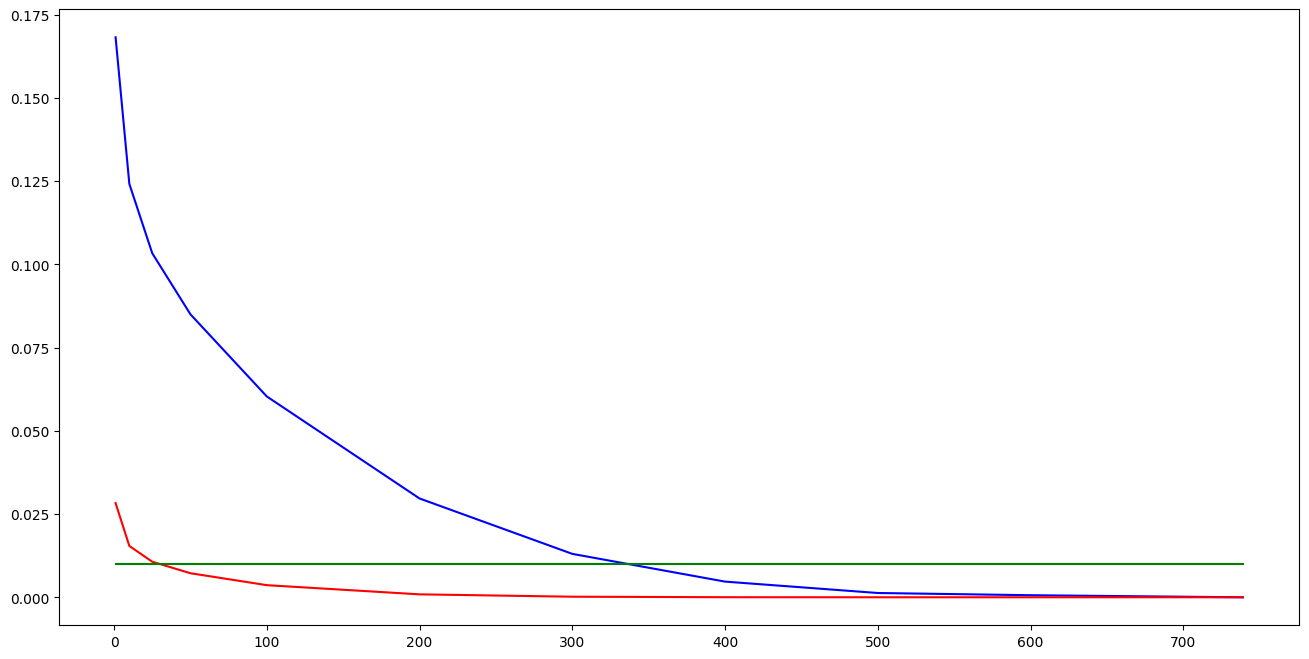

In [29]:
plt.plot(ranks, errors, color='blue')
plt.plot(ranks, variances, color='red')
plt.plot(ranks, np.ones(len(ranks))*0.01, color='green')


4. Find the rank $$\tilde{r}$$ for which the reconstruction captures 99% of the total variance.

searched rank is:  29
explained variance is:  0.9900412020980658


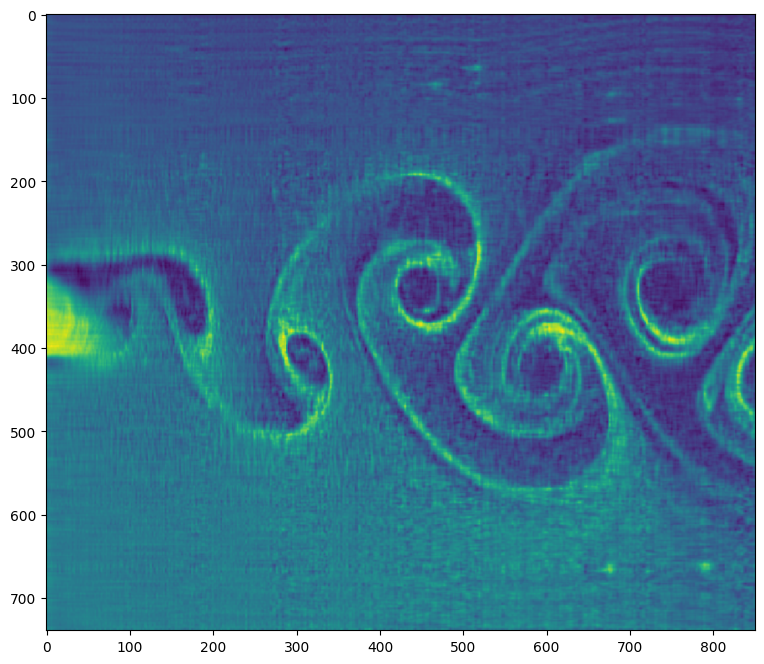

In [34]:
low_ranks = np.arange(10, 300, 1)
for r in low_ranks:
    X_tilde = U[:, :r] @ np.diag(s[:r]) @ VT[:r, :]
    unexplained_variance = reconstruction_error(X, X_tilde)**2
    if unexplained_variance <= 0.01:
        searched_rank = r
        break
print('searched rank is: ', r)
print('explained variance is: ', 1 - unexplained_variance)

X_tilde = U[:, :searched_rank] @ np.diag(s[:searched_rank]) @ VT[:searched_rank, :]
plt.imshow(X_tilde)


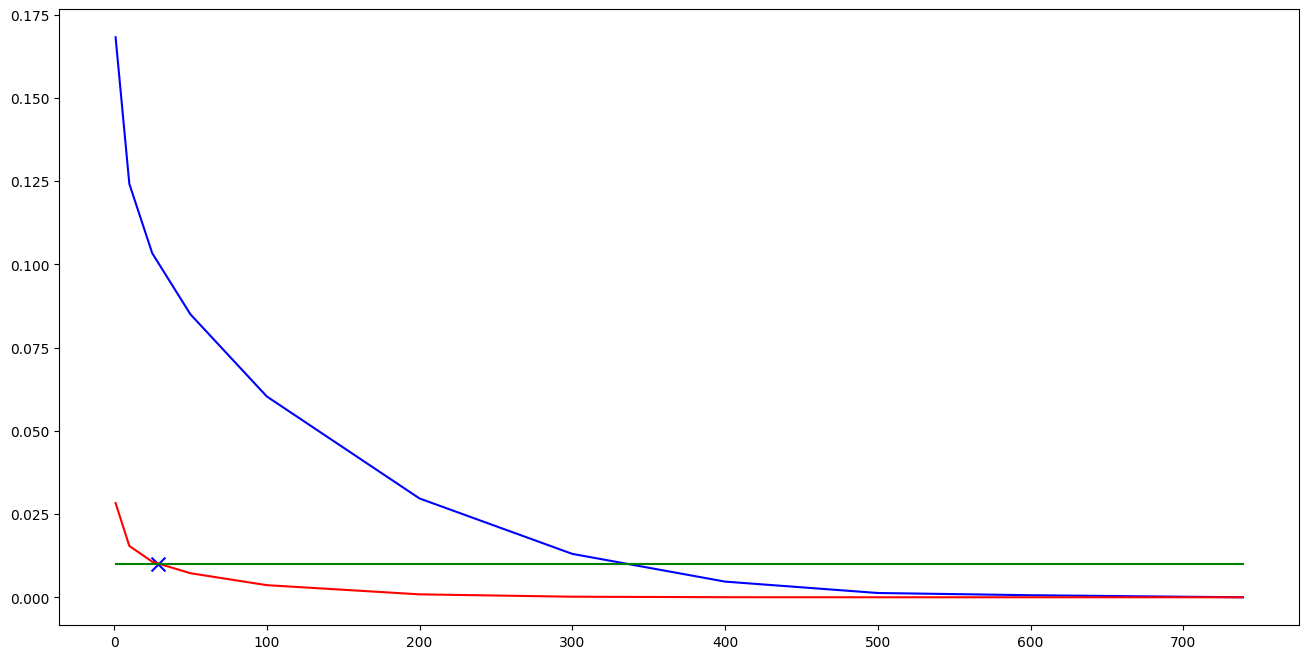

In [35]:
plt.plot(ranks, errors, color='blue')
plt.plot(ranks, variances, color='red')
plt.plot(ranks, np.ones(len(ranks))*0.01, color='green')
plt.scatter(r, unexplained_variance, color='blue', marker='x', s=100)